In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('tweets.csv')
data

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [4]:
data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [5]:
data.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [6]:
data.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


In [7]:
data.location.fillna("No Location" , inplace= True)

In [8]:
data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [9]:
Real_len = data[data['target'] == 1].shape[0]
Not_len = data[data['target'] == 0].shape[0]

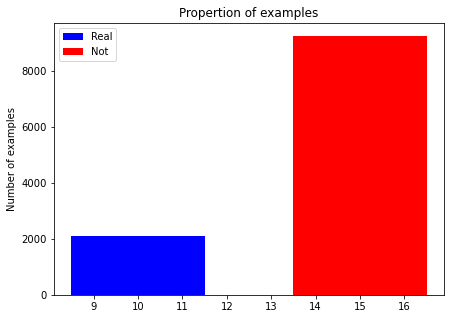

In [10]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

In [11]:
data_0 = data[data['target']==0]
data_1 = data[data['target']==1]
data_0_sampled = data_0.sample(data.target.value_counts()[1])
data_0_sampled

,id,keyword,location,text,target
2002,2002,casualties,"Fife, Scotland",Such a loss to and the people of NE Fife. pays...,0
6036,6036,hail,No Location,"5 days to go till the real, famous and mouth w...",0
5187,5187,explosion,phx —— he/him ♎︎,“I see why gay people are celebrating the expl...,0
7789,7789,obliterate,No Location,"I, DIO, may be evil, but I, DIO, shall obliter...",0
5960,5960,forest%20fire,LONDON,I can’t believe the academy that gave Best Pic...,0
...,...,...,...,...,...
6046,6046,hail,⚧️ECCE HOMOSEXUAL⚧️,i wanna tie up cuties and be tied up by cuties...,0
9045,9045,screams,United States,"Oh I hope she screams at trees! Also, the thou...",0
3187,3187,deaths,"Lynden, WA","Very interesting, this also throws a wrench in...",0
7451,7451,meltdown,No Location,"""There was a national meltdown. Middle-aged wo...",0


In [12]:
frames = [data_1,data_0_sampled]
data = pd.concat(frames)
data

,id,keyword,location,text,target
0,0,ablaze,No Location,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,No Location,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1
...,...,...,...,...,...
6046,6046,hail,⚧️ECCE HOMOSEXUAL⚧️,i wanna tie up cuties and be tied up by cuties...,0
9045,9045,screams,United States,"Oh I hope she screams at trees! Also, the thou...",0
3187,3187,deaths,"Lynden, WA","Very interesting, this also throws a wrench in...",0
7451,7451,meltdown,No Location,"""There was a national meltdown. Middle-aged wo...",0


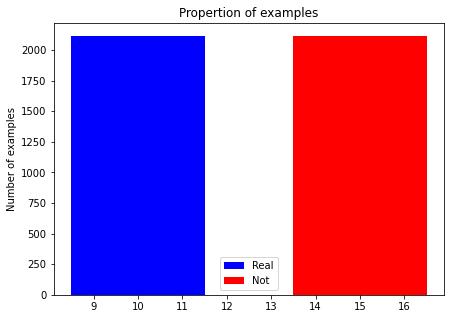

In [13]:
Real_len = data[data['target'] == 1].shape[0]
Not_len = data[data['target'] == 0].shape[0]
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

In [14]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [15]:
def length(string):    
    return len(string)
data['length'] = data['text'].apply(length)

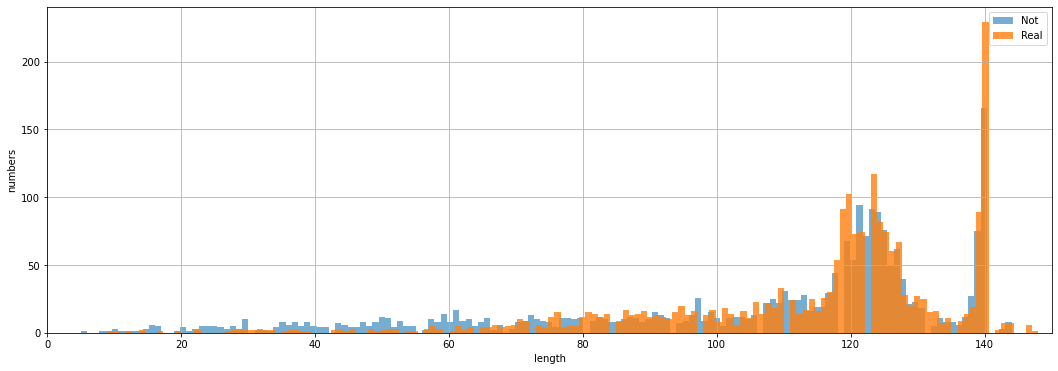

In [16]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(data[data['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(data[data['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

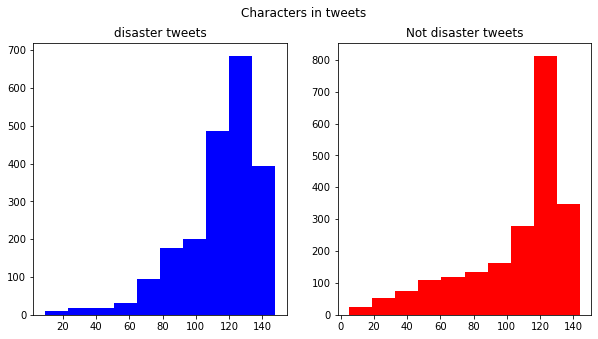

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=data[data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [18]:
data.duplicated()

0       False
1       False
2       False
3       False
6       False
        ...  
6046    False
9045    False
3187    False
7451    False
6218    False
Length: 4228, dtype: bool

In [19]:
#Count of duplicated rows
data[data.duplicated()].sum()

id          0.0
keyword     0.0
location    0.0
text        0.0
target      0.0
length      0.0
dtype: float64

In [20]:
data[~data.duplicated()]

,id,keyword,location,text,target,length
0,0,ablaze,No Location,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125
1,1,ablaze,No Location,Telangana: Section 144 has been imposed in Bha...,1,131
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,63
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,87
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1,139
...,...,...,...,...,...,...
6046,6046,hail,⚧️ECCE HOMOSEXUAL⚧️,i wanna tie up cuties and be tied up by cuties...,0,123
9045,9045,screams,United States,"Oh I hope she screams at trees! Also, the thou...",0,129
3187,3187,deaths,"Lynden, WA","Very interesting, this also throws a wrench in...",0,122
7451,7451,meltdown,No Location,"""There was a national meltdown. Middle-aged wo...",0,112


In [21]:
import re
data.text = data.text.apply(lambda x: re.sub('[^a-zA-Z ]',"",x))
data.keyword= data.keyword.apply(lambda x: re.sub('[^a-zA-Z ]',"",x))

In [22]:
data

,id,keyword,location,text,target,length
0,0,ablaze,No Location,Communal violence in Bhainsa Telangana Stones ...,1,125
1,1,ablaze,No Location,Telangana Section has been imposed in Bhainsa...,1,131
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership httpst...,1,63
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership httpst...,1,87
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1,139
...,...,...,...,...,...,...
6046,6046,hail,⚧️ECCE HOMOSEXUAL⚧️,i wanna tie up cuties and be tied up by cuties...,0,123
9045,9045,screams,United States,Oh I hope she screams at trees Also the though...,0,129
3187,3187,deaths,"Lynden, WA",Very interesting this also throws a wrench int...,0,122
7451,7451,meltdown,No Location,There was a national meltdown Middleaged women...,0,112


In [23]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [25]:
data.text = data.text.apply(lambda x : x.split())
data.keyword=data.keyword.apply(lambda x: x.lower())

In [26]:
data.head()

,id,keyword,location,text,target,length
0,0,ablaze,No Location,"[Communal, violence, in, Bhainsa, Telangana, S...",1,125
1,1,ablaze,No Location,"[Telangana, Section, has, been, imposed, in, B...",1,131
2,2,ablaze,New York City,"[Arsonist, sets, cars, ablaze, at, dealership,...",1,63
3,3,ablaze,"Morgantown, WV","[Arsonist, sets, cars, ablaze, at, dealership,...",1,87
6,6,ablaze,"London, England","[Several, houses, have, been, set, ablaze, in,...",1,139


In [27]:
data['word_count'] = data.text.apply(lambda x : len(str(x).split(',')))

In [28]:
data.head()

,id,keyword,location,text,target,length,word_count
0,0,ablaze,No Location,"[Communal, violence, in, Bhainsa, Telangana, S...",1,125,19
1,1,ablaze,No Location,"[Telangana, Section, has, been, imposed, in, B...",1,131,19
2,2,ablaze,New York City,"[Arsonist, sets, cars, ablaze, at, dealership,...",1,63,7
3,3,ablaze,"Morgantown, WV","[Arsonist, sets, cars, ablaze, at, dealership,...",1,87,8
6,6,ablaze,"London, England","[Several, houses, have, been, set, ablaze, in,...",1,139,21


In [29]:
data.text=data.text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])
data['word_count2'] = data.text.apply(lambda x : len(str(x).split(',')))

In [30]:
data.head()

,id,keyword,location,text,target,length,word_count,word_count2
0,0,ablaze,No Location,"[Communal, violence, Bhainsa, Telangana, Stone...",1,125,19,12
1,1,ablaze,No Location,"[Telangana, Section, imposed, Bhainsa, January...",1,131,19,11
2,2,ablaze,New York City,"[Arsonist, sets, cars, ablaze, dealership, htt...",1,63,7,6
3,3,ablaze,"Morgantown, WV","[Arsonist, sets, cars, ablaze, dealership, htt...",1,87,8,7
6,6,ablaze,"London, England","[Several, houses, set, ablaze, Ngemsibaa, vill...",1,139,21,14


In [31]:
ps = PorterStemmer()

In [32]:
data.text=data.text.apply(lambda x: [ps.stem(word) for word in x])

In [33]:
data.head()

,id,keyword,location,text,target,length,word_count,word_count2
0,0,ablaze,No Location,"[commun, violenc, bhainsa, telangana, stone, p...",1,125,19,12
1,1,ablaze,No Location,"[telangana, section, impos, bhainsa, januari, ...",1,131,19,11
2,2,ablaze,New York City,"[arsonist, set, car, ablaz, dealership, httpst...",1,63,7,6
3,3,ablaze,"Morgantown, WV","[arsonist, set, car, ablaz, dealership, httpst...",1,87,8,7
6,6,ablaze,"London, England","[sever, hous, set, ablaz, ngemsibaa, villag, o...",1,139,21,14


In [34]:
data.text = data.text.apply(lambda x: " ".join(x))

In [35]:
data

,id,keyword,location,text,target,length,word_count,word_count2
0,0,ablaze,No Location,commun violenc bhainsa telangana stone pelt mu...,1,125,19,12
1,1,ablaze,No Location,telangana section impos bhainsa januari clash ...,1,131,19,11
2,2,ablaze,New York City,arsonist set car ablaz dealership httpstcogoqv...,1,63,7,6
3,3,ablaze,"Morgantown, WV",arsonist set car ablaz dealership httpstcoglnu...,1,87,8,7
6,6,ablaze,"London, England",sever hous set ablaz ngemsibaa villag oku sub ...,1,139,21,14
...,...,...,...,...,...,...,...,...
6046,6046,hail,⚧️ECCE HOMOSEXUAL⚧️,wanna tie cuti tie cuti ideal prenegoti unders...,0,123,22,10
9045,9045,screams,United States,oh i hope scream tree also thought smash glass...,0,129,22,13
3187,3187,deaths,"Lynden, WA",veri interest also throw wrench idea trump aut...,0,122,20,12
7451,7451,meltdown,No Location,there nation meltdown middleag women lose plot...,0,112,14,10


C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 keywords for non-disaster tweets')

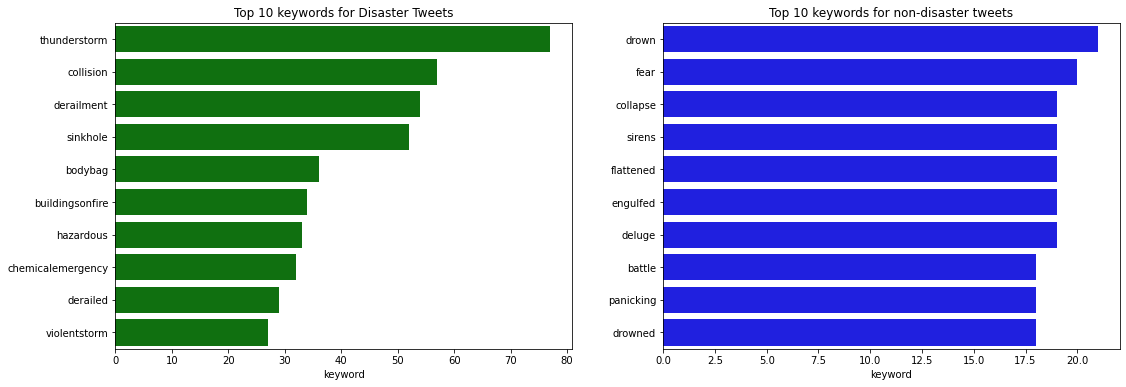

In [36]:
disaster = data[data['target']==1]
non_disaster = data[data['target']==0]

keywords_disaster = disaster.keyword.value_counts().head(10)
keywords_non_disaster = non_disaster.keyword.value_counts().head(10)

plt.figure(figsize=(18,6))
plt.subplot(121)
sns.barplot(keywords_disaster, keywords_disaster.index, color='g')
plt. title('Top 10 keywords for Disaster Tweets')

plt.subplot(122)
sns.barplot(keywords_non_disaster, keywords_non_disaster.index, color='b')
plt.title('Top 10 keywords for non-disaster tweets')

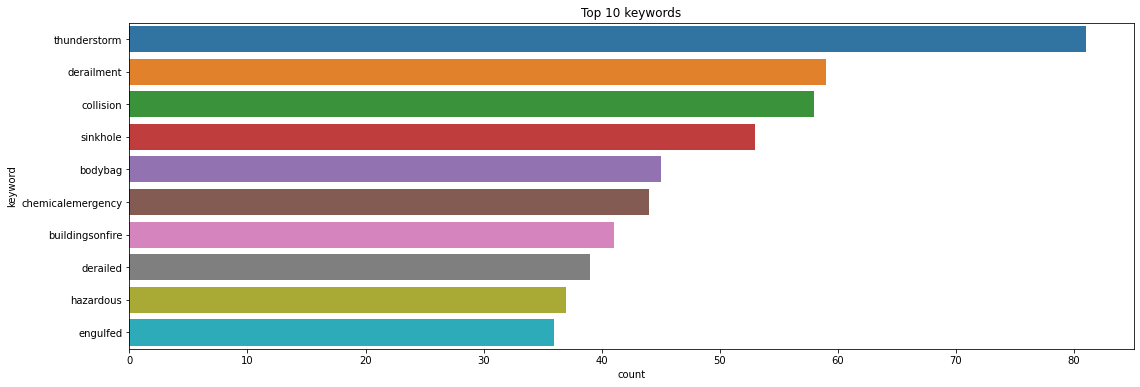

In [37]:
# Exploring Keywords and their distribution
sns.countplot(y=data.keyword, order = data.keyword.value_counts().iloc[:10].index)
plt.title('Top 10 keywords')
plt.show()

In [38]:
from wordcloud import WordCloud # Word Cloud library
# word cloud distribution
texts = " ".join(i for i in data.text)
wc = WordCloud(max_words=100,background_color= "white", max_font_size=50, stopwords=stop)
wc.generate(texts)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
pip install wordcloud